In [1]:
import folium
import fiona
import shapely
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import multiprocessing
CPUS = multiprocessing.cpu_count()
POOL = multiprocessing.Pool(processes=CPUS)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)


ImportError: No module named folium

In [2]:
from IPython import display
display.Image(width=1000, 
              url="https://www.nps.gov/common/uploads/banner_image/pwr/homepage/575C3B44-1DD8-B71B-0BD879DB3BC0AD69.jpg?width=2400&height=700&mode=crop&quality=90") 


# How Far do Americans Live from National Parks? 

We start with a shapefile of all National Parks. 

In [5]:
parks = gpd.GeoDataFrame.from_file("./nps_boundary_shp/nps_boundary.shp", crs='EPSG:4326')
parks.crs

{'init': 'epsg:4326'}

Some of the parks have overlapping polygons--we'll start by removing these, even though that's probably not a big deal in the analysis. 

In [7]:
from shapely.ops import unary_union
groups = [group for group in parks.groupby(by="UNIT_NAME") if len(group[1]) > 1]
def selfUnion(x):
    return unary_union(x.geometry)

names, geoms = zip(*groups)
geometries = POOL.map(selfUnion, geoms)

geo2 =gpd.GeoDataFrame(list(zip(names, geometries)))
geo2 =geo2.set_geometry(list(geo2[[1]][1]))
geo2 = geo2.drop(1, axis=1)
geo2 = geo2.rename(columns = {0: "UNIT_NAME"})
groupedGeoms = geo2

#geo2.join(parks.set_index(parks["UNIT_NAME", on="UNIT_NAME", how='outer', lsuffix="grouped")

In [33]:
parks_and_monuments = parks[(parks["UNIT_TYPE"] == "National Park") | (parks["UNIT_TYPE"] == "National Monument")]

In [34]:
def minDistance(geodf, lon, lat):
    return geodf.distance(shapely.geometry.Point(lon, lat)).min()

## test: UW is at 47.655548, -122.303200 (lat lon)
lat, lon = 47.665548, -122.303200
minDistance(parks, lon, lat)

from itertools import product
lon = np.arange(-126, -66, 0.4)
lat = np.arange(24, 49, 0.4)

pandm_results = np.zeros((len(lat), len(lon)))
for idxla, la in enumerate(lat):
    for idxlo, lo in enumerate(lon):
        pandm_results[idxla, idxlo] = minDistance(parks_and_monuments, lo, la)


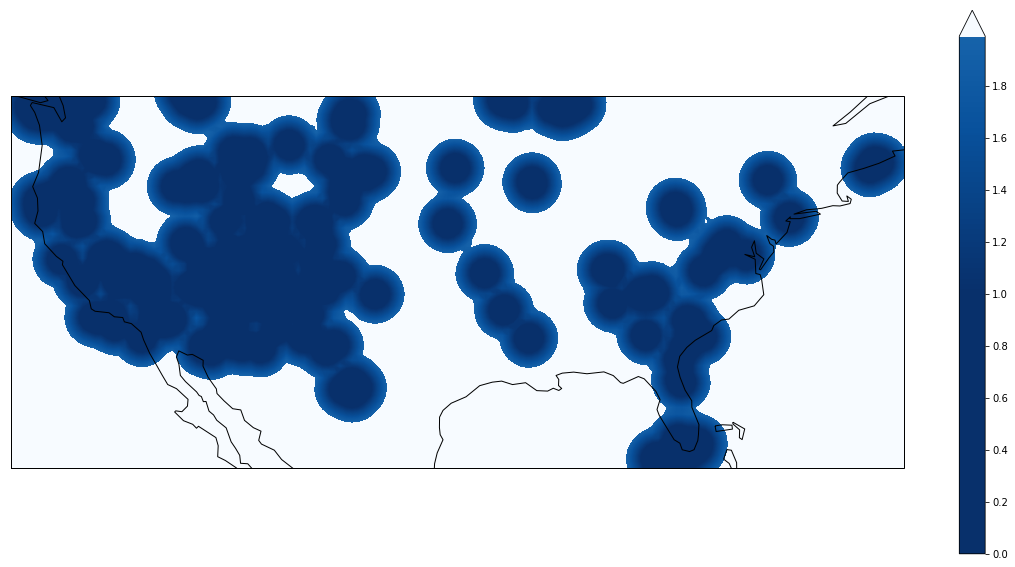

In [35]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.feature import NaturalEarthFeature
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
p = plt.contourf(lon, lat, pandm_results, levels=np.arange(0, 2, 0.01),
                 cmap=pyplot.cm.Blues_r, 
                 extend="max", 
                 transform=ccrs.PlateCarree())
p.set_clim(1,6)
plt.colorbar()

NameError: name 'results' is not defined

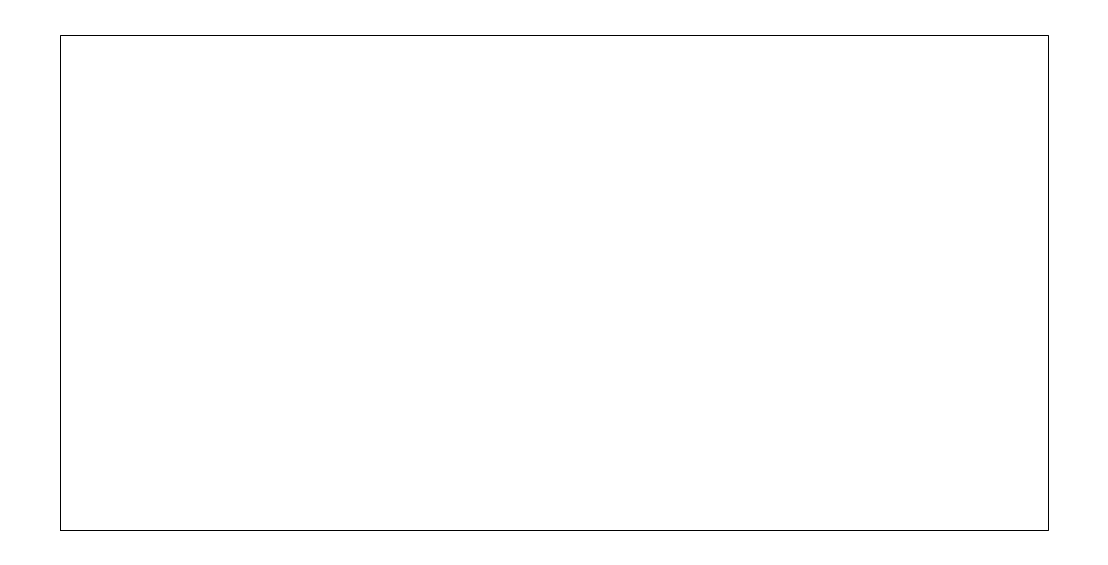

In [36]:
ax = plt.axes(projection=ccrs.PlateCarree())
p = plt.contour(lon, lat, results, levels=np.arange(0, 12, 2), cmap=pyplot.cm.Blues_r, extend="max",)
states_shp = NaturalEarthFeature(scale='50m', facecolor='white',
                                         category='cultural', name='admin_1_states_provinces_lines')
ax.add_feature(states_shp)
plt.colorbar()

In [110]:
np.save("CONUS_closeness_degrees", results)

In [118]:
?ccrs.CRS

USA extent: Extent: (-124.848974, 24.396308) - (-66.885444, 49.384358) (from [here](https://www.quora.com/What-is-the-longitude-and-latitude-of-a-bounding-box-around-the-continental-United-States))



In [93]:
CONUS_minlon = -124.8
CONUS_maxlon = -66.9
CONUS_minlat = 24.0
CONUS_maxlat = 55.0

AK_minlon = -168.6
AK_maxlon = -130.0
AK_minlat = 51.2,
AK_maxlat = 71.4

In [85]:

meandistgrid = list(zip(grid, meandistances))
meanplottable = [(lon, lat, d) for (lon, lat), d in meandistgrid]
meandistgrid = pd.DataFrame(meanplottable)
geoms = [shapely.geometry.Point(lon, lat) for lon, lat, dist in meanplottable]

In [8]:
data = np.load("./CONUS_closeness_degrees.npy")

/Users/tony/miniconda3/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


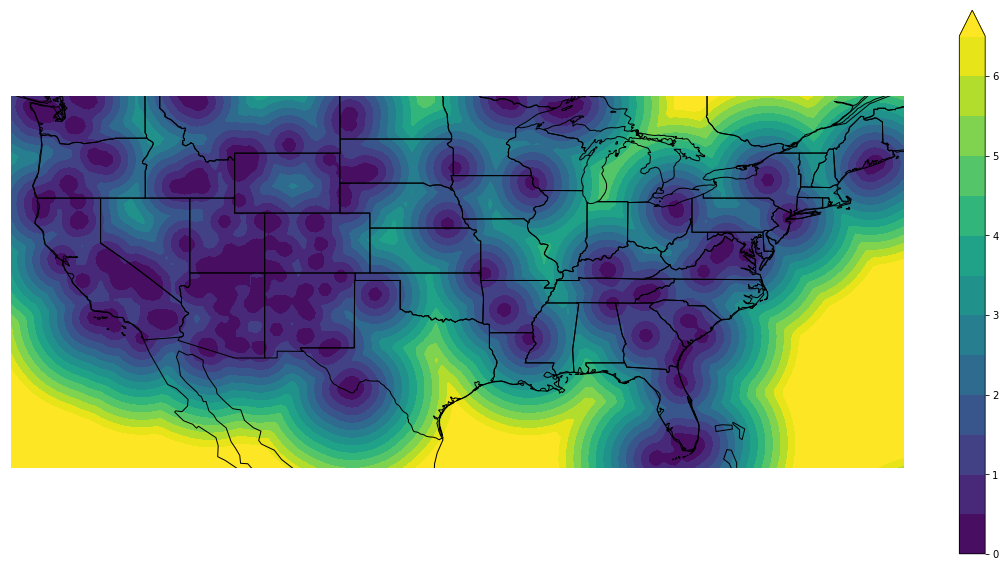

In [88]:
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, RIVERS, COASTLINE

lon = np.arange(CONUS_minlon, CONUS_maxlon, 0.4)
lat = np.arange(CONUS_minlat, CONUS_maxlat, 0.4)
data
projection = ccrs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=projection))
ax.add_feature(COASTLINE)
ax.add_feature(NaturalEarthFeature(category='cultural', scale='50m', edgecolor='black', facecolor='none',
                             name='admin_1_states_provinces_lakes_shp'))
plt.contourf(lon, lat, pandm_results, levels=np.arange(0, 7, 0.5),transform=ccrs.PlateCarree(), extend="max")
ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

plt.colorbar()

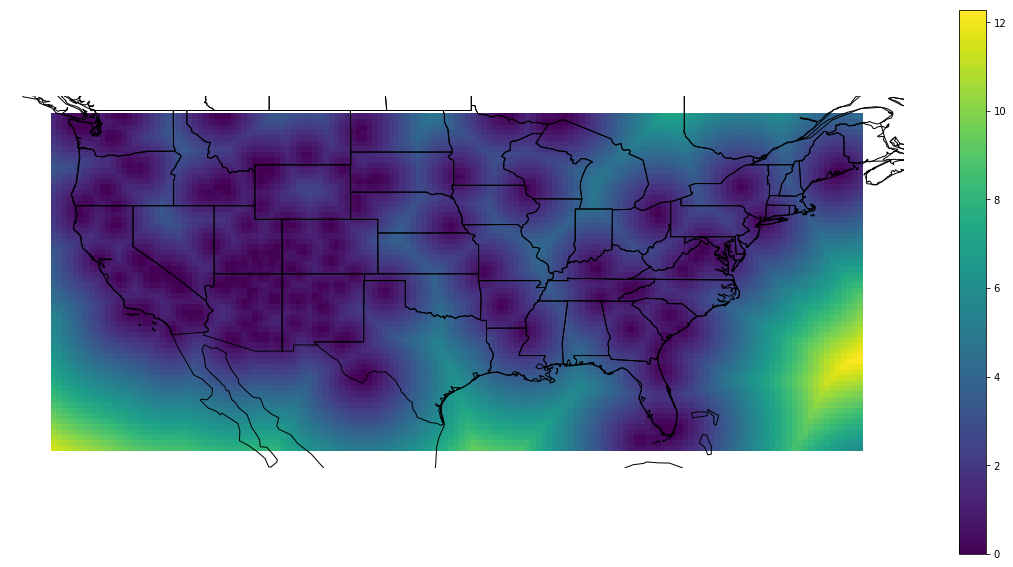

In [62]:

fig, ax = plt.subplots(subplot_kw=dict(projection=projection))
ax.add_feature(COASTLINE)
ax.add_feature(NaturalEarthFeature(category='cultural', scale='50m', edgecolor='black', facecolor='none',
                             name='admin_1_states_provinces_shp'))
plt.pcolormesh(lon, lat, pandm_results,transform=ccrs.PlateCarree())
ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

plt.colorbar()

In [32]:
parks_and_monuments[parks_and_monuments["UNIT_TYPE"] == "National Park"]

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,geometry,id,observed


In [92]:
list(np.arange(10, 20, 1)) + list(np.arange(25, 30, 2))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 27, 29]

In [94]:
parks.crs

{'init': 'epsg:4326'}